## Bitcoin Assignment 1
### Name: Isaac Coffie
### Andrew ID: coffie
### Date: January 20th, 2020

In [1]:
#import libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn import metrics
import datetime as dt


In [2]:
##register matplotlib datetime warnings
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.rcParams["figure.figsize"] = (50,20)  ##Define plotting size

## Loading Bitcoin dataset

In [9]:
##Load in dataset

bitcoin_dataset = pd.read_csv("bitcoin_dataset1.csv")
bitcoin_dataset = bitcoin_dataset[["Date", "btc_market_price"]]

## Monthly distribution of bitcoin price

Text(0.5, 1.0, 'A Time Series Graph Showing the Monthly Prices of Bitcoin from 2010 to 2018')

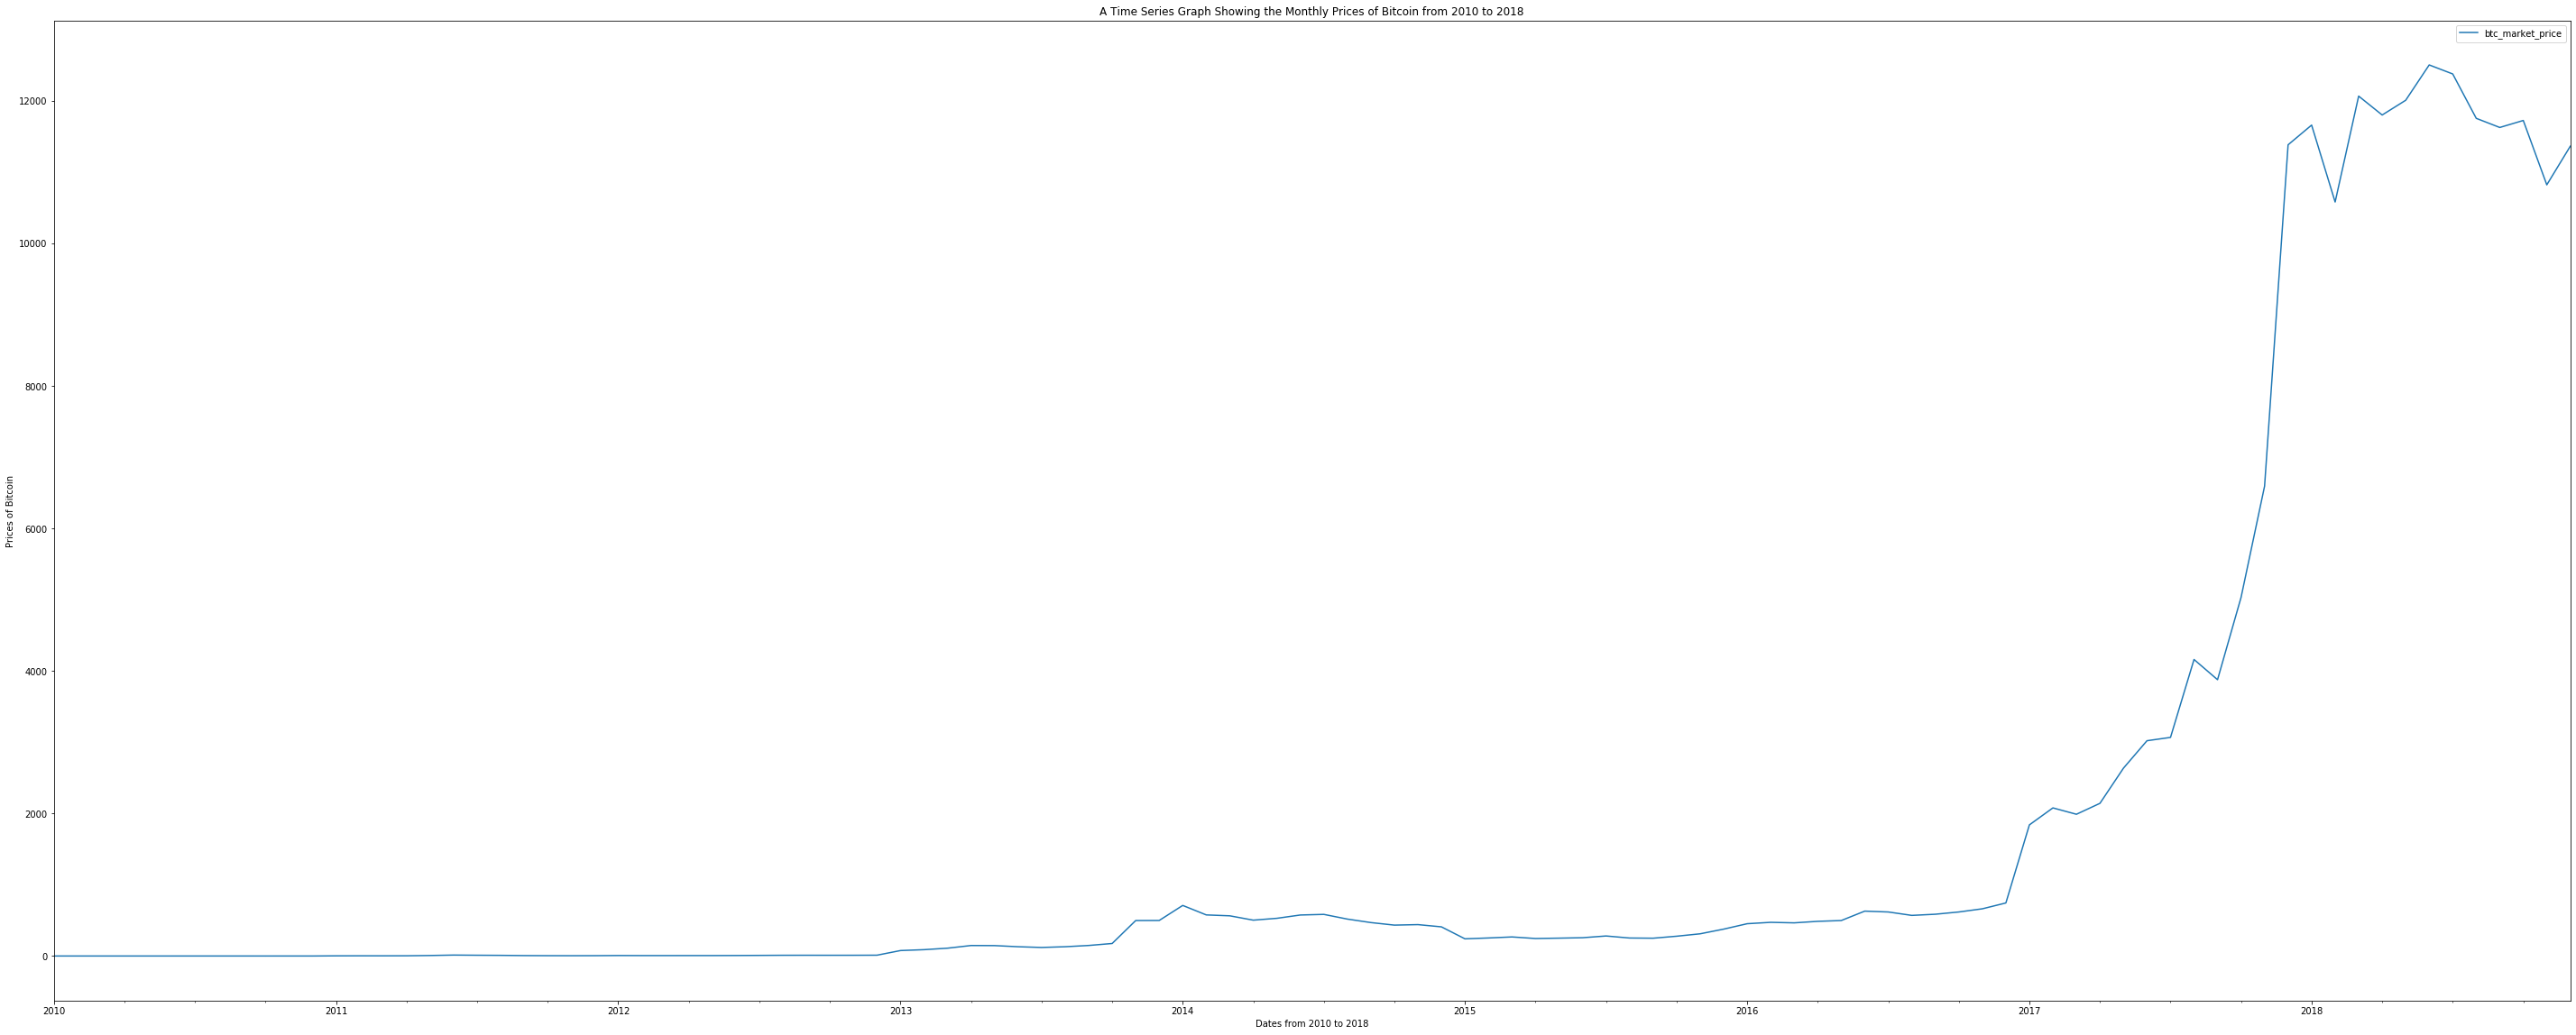

In [10]:
#Monthly resampling of data
bitcoin_dataset["Date"] = pd.to_datetime(bitcoin_dataset["Date"])
bitcoin_dataset.set_index('Date', inplace=True)
bitcoin_dataset = bitcoin_dataset.resample('M').mean()
bitcoin_dataset["btc_market_price"].fillna(bitcoin_dataset["btc_market_price"].mean(), inplace=True)

##Plot graph
bitcoin_dataset.plot()
plt.xlabel("Dates from 2010 to 2018")
plt.ylabel("Prices of Bitcoin")
plt.title("A Time Series Graph Showing the Monthly Prices of Bitcoin from 2010 to 2018")

## Log transform

Text(0.5, 1.0, 'A Time Series Graph Showing the Monthly Log Transformed Prices of Bitcoin from 2010 to 2018')

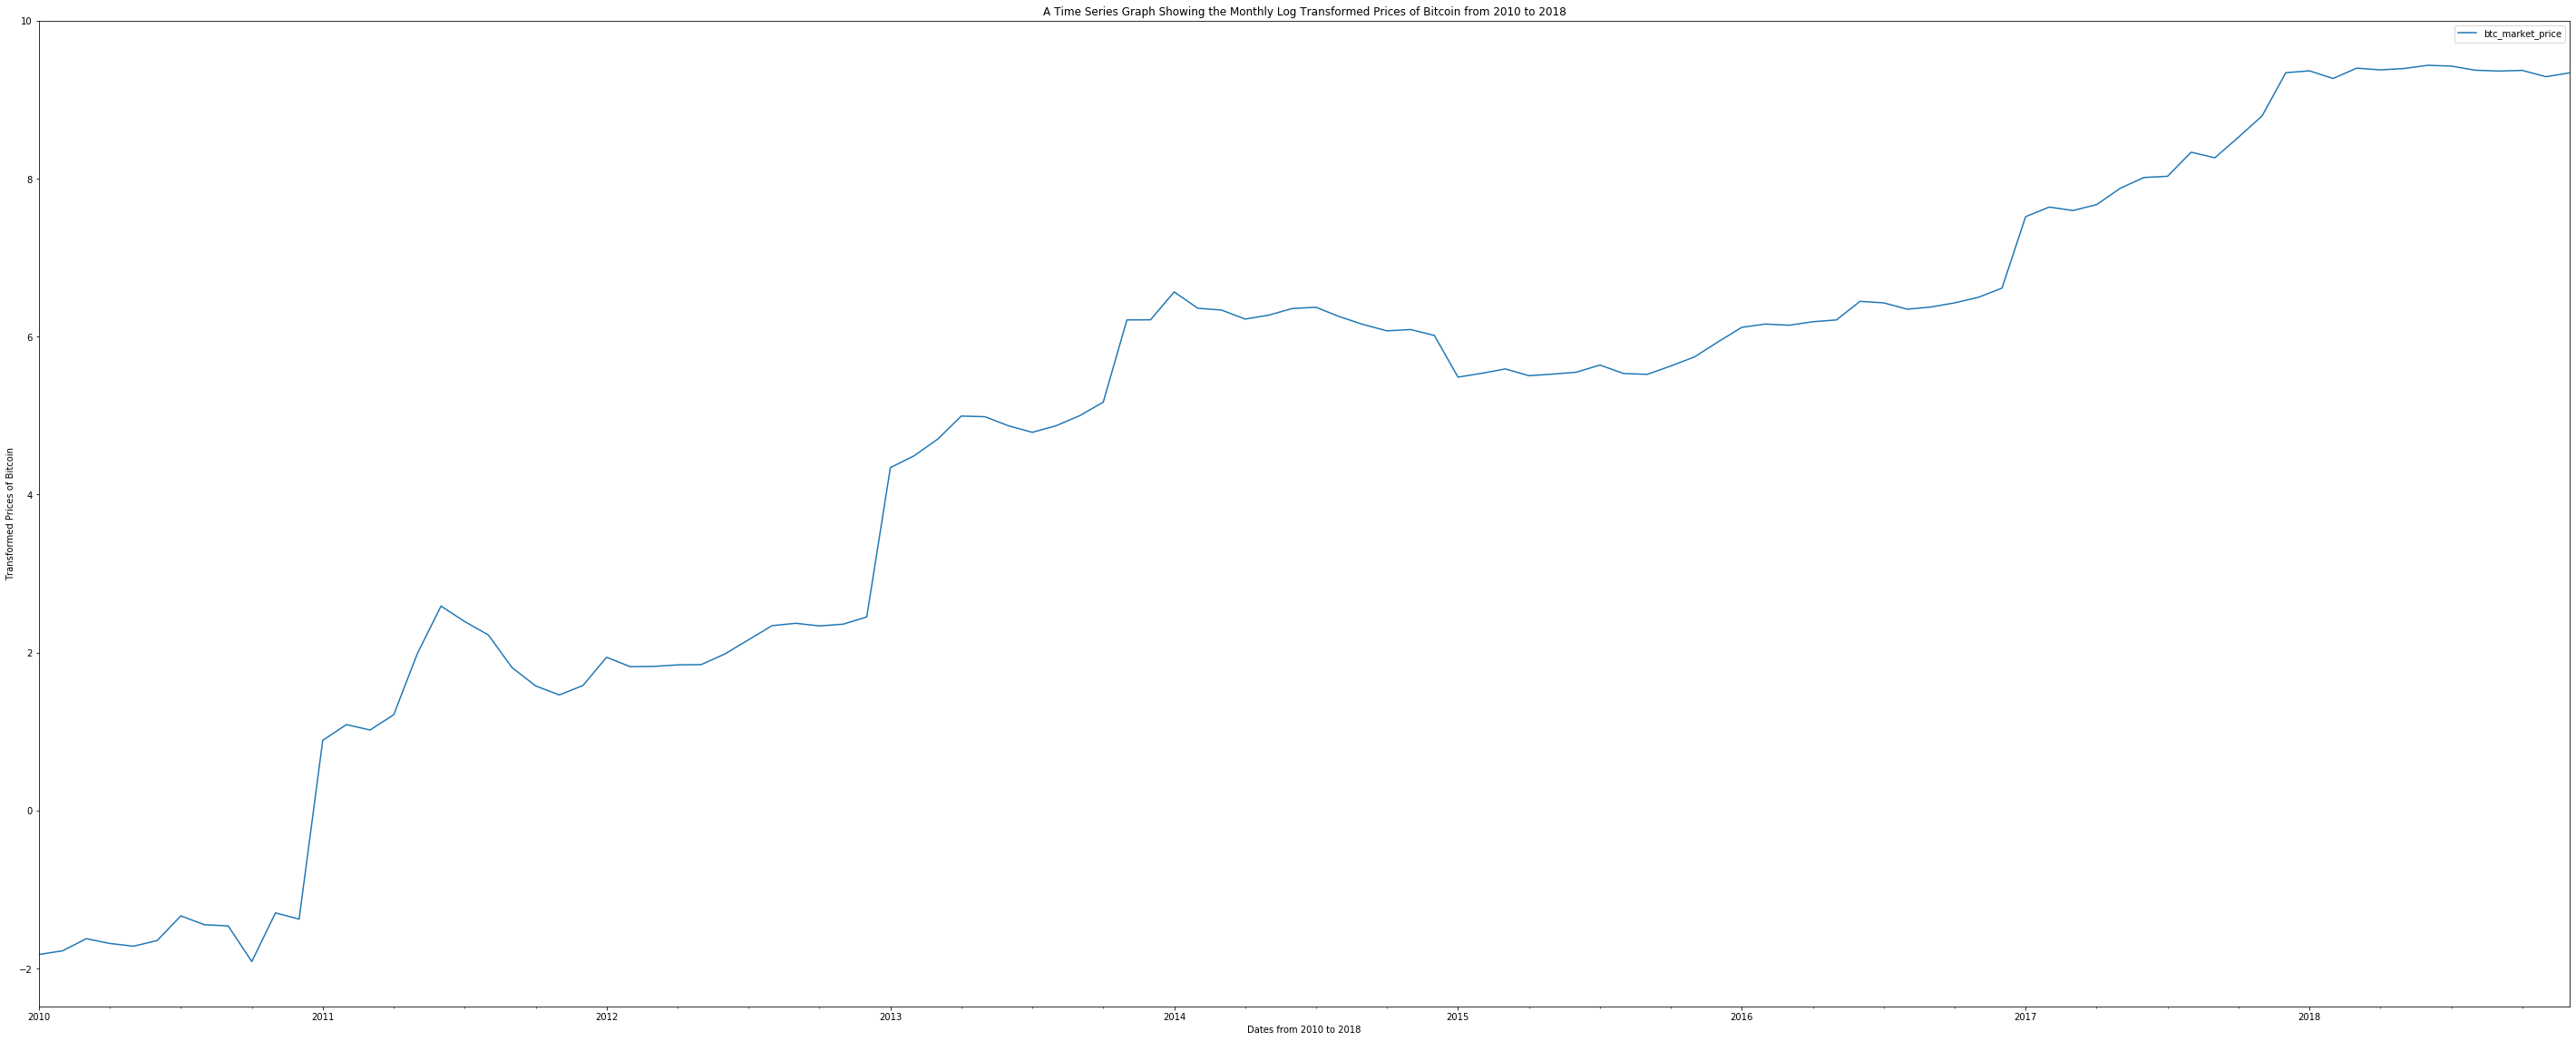

In [11]:
bitcoin_dataset.reset_index(inplace=True)
bitcoin_dataset["btc_market_price"] = np.log(bitcoin_dataset["btc_market_price"])
bitcoin_dataset["Date"] = pd.to_datetime(bitcoin_dataset["Date"])
bitcoin_dataset.set_index('Date', inplace=True)
bitcoin_dataset["btc_market_price"].fillna(bitcoin_dataset["btc_market_price"].mean(), inplace=True)

bitcoin_dataset.plot()
plt.xlabel("Dates from 2010 to 2018")
plt.ylabel("Transformed Prices of Bitcoin")
plt.title("A Time Series Graph Showing the Monthly Log Transformed Prices of Bitcoin from 2010 to 2018")

## Convert date string into ordinal real numbers

In [12]:

bitcoin_dataset.reset_index(inplace=True)
daily_bitcoin_prices = bitcoin_dataset["btc_market_price"]
time_series_date = bitcoin_dataset["Date"]

bitcoin_dataset["Date"] = pd.to_datetime(bitcoin_dataset["Date"])
bitcoin_dataset["Date"] = bitcoin_dataset["Date"].map(dt.datetime.toordinal)


In [13]:
bitcoin_dataset.head()

,Date,btc_market_price
0,733803,-1.823252
1,733831,-1.776873
2,733862,-1.623368
3,733892,-1.683964
4,733923,-1.718676


## Model Fitting

In [14]:
bitcoin_model = linear_model.LinearRegression()

X = np.array([bitcoin_dataset["Date"]]).reshape(-1,1)
y = np.array([bitcoin_dataset["btc_market_price"]]).reshape(-1,1)

Constant: [-2405.76743058], Slope: [[0.00327772]]


Text(0.5, 1.0, 'A Plot Showing the Predicted Bitcoin Price Against the Actual')

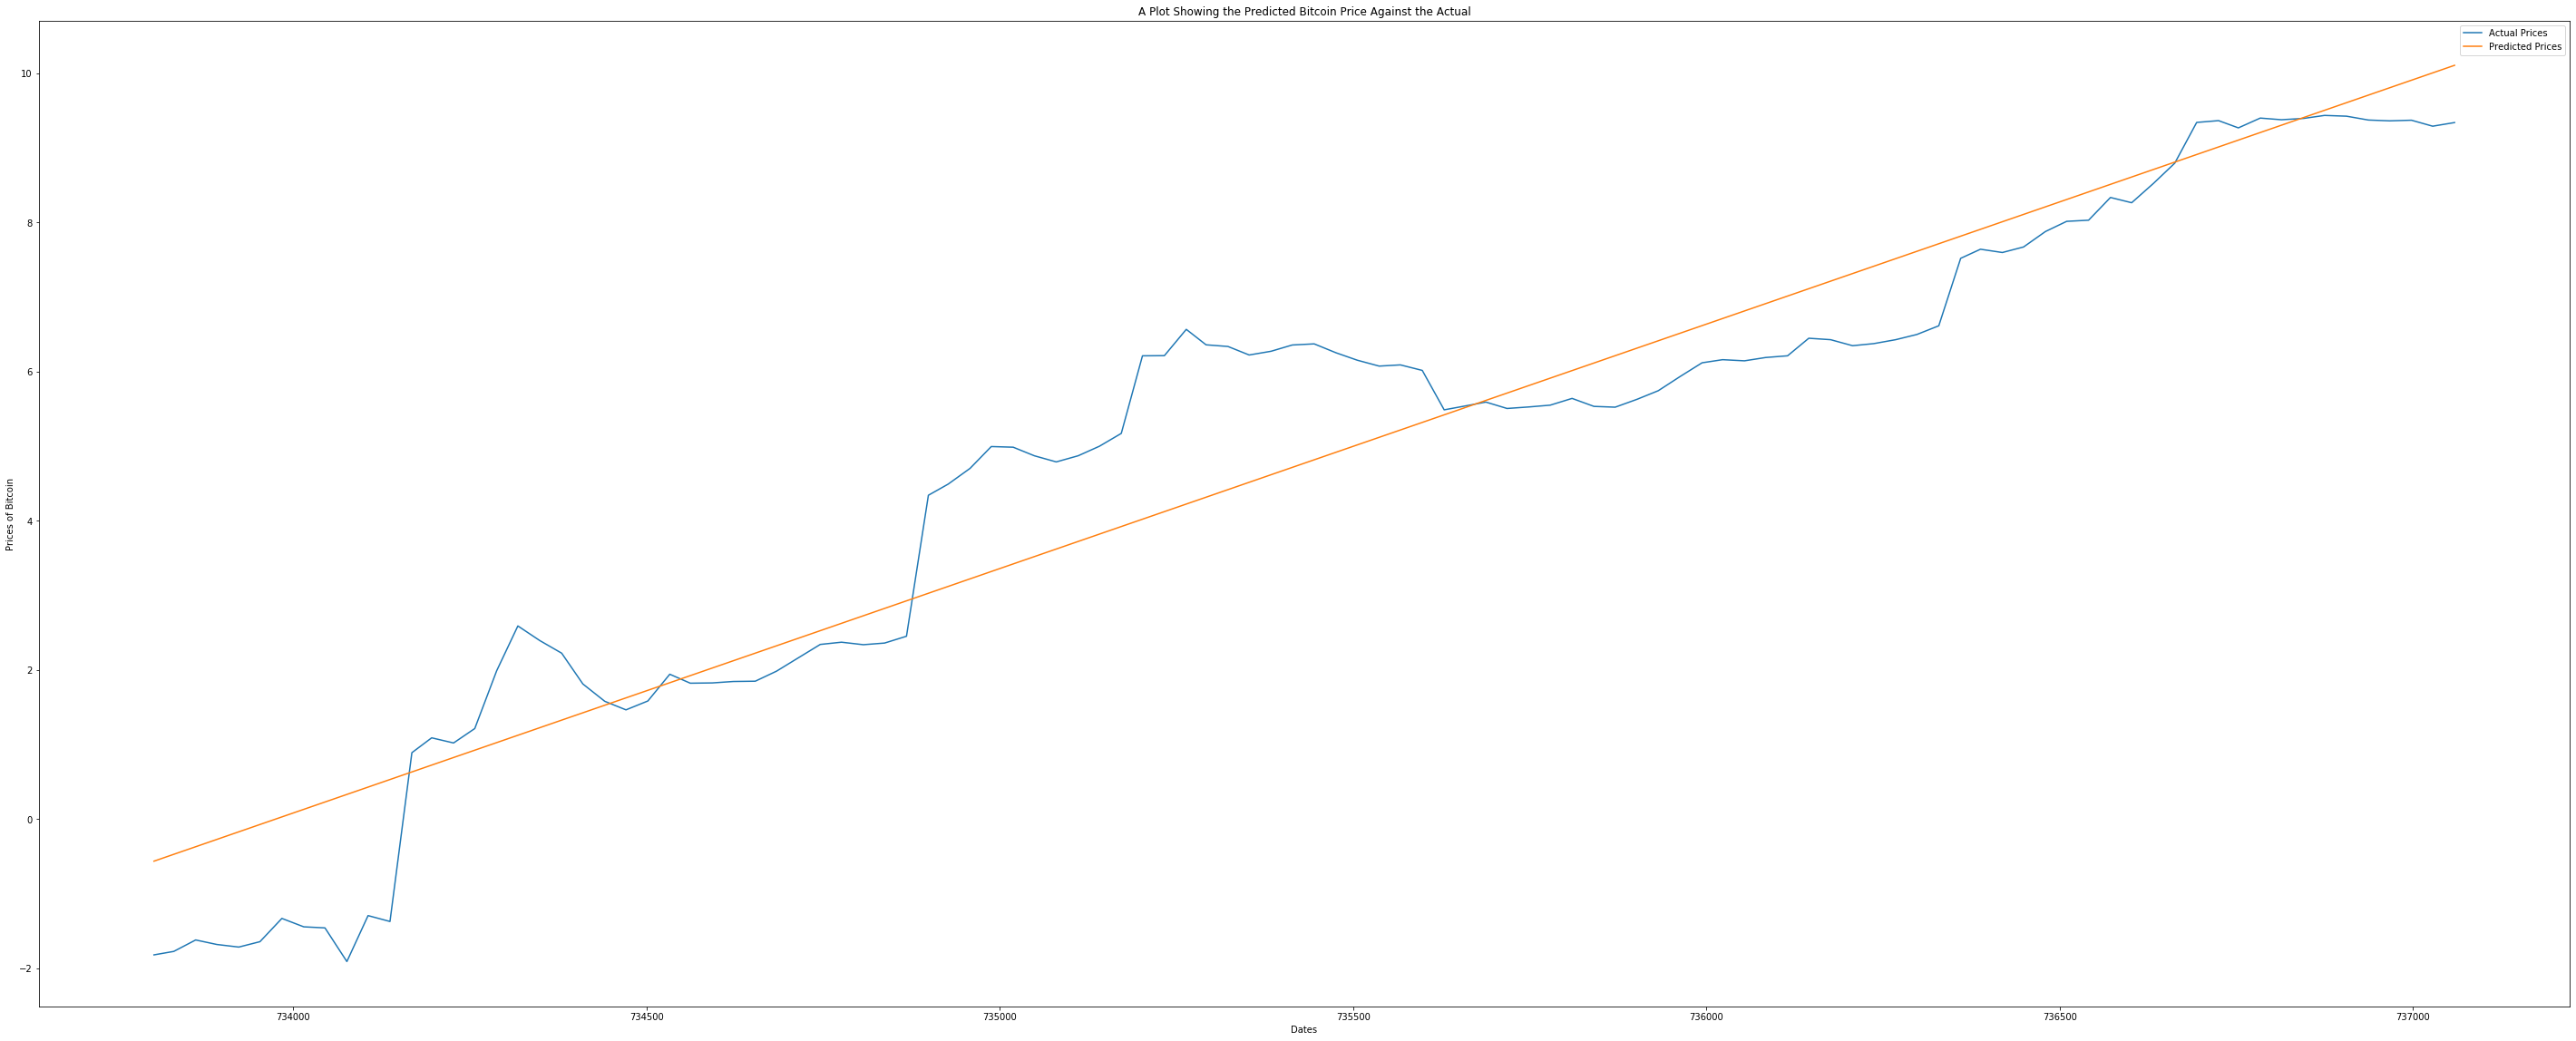

In [15]:
bitcoin_model.fit(X,y)

print ("Constant: {0}, Slope: {1}". format(bitcoin_model.intercept_, bitcoin_model.coef_))
 
y_predic = bitcoin_model.predict(X)


plt.plot(X, y, label="Actual Prices")
plt.plot(X, y_predic, label="Predicted Prices")
plt.legend()
plt.xlabel("Dates")
plt.ylabel("Prices of Bitcoin")
plt.title("A Plot Showing the Predicted Bitcoin Price Against the Actual")

## Model Evaluation

In [16]:
mape = np.mean(np.abs((y-y_predic) / y)) * 100

print(" The MAPE of the model is", round(mape, 4))

 The MAPE of the model is 24.6904


## Forcasting

In [17]:

date_range = pd.date_range(start='2018-03-01', periods=20, freq="W")
forcast_dates = date_range.map(dt.datetime.toordinal)
forcasted_price = []

for date in forcast_dates:
    y_hat = bitcoin_model.predict(np.array([[date]]))
    print("Predicted Price of Bitcoin in {0} : {1}".format(dt.datetime.fromordinal(date), np.exp(y_hat)))
    forcasted_price.append(y_hat[0][0])

Predicted Price of Bitcoin in 2018-03-04 00:00:00 : [[9098.15422364]]
Predicted Price of Bitcoin in 2018-03-11 00:00:00 : [[9309.31583394]]
Predicted Price of Bitcoin in 2018-03-18 00:00:00 : [[9525.37835322]]
Predicted Price of Bitcoin in 2018-03-25 00:00:00 : [[9746.45552804]]
Predicted Price of Bitcoin in 2018-04-01 00:00:00 : [[9972.66374495]]
Predicted Price of Bitcoin in 2018-04-08 00:00:00 : [[10204.12209173]]
Predicted Price of Bitcoin in 2018-04-15 00:00:00 : [[10440.95242013]]
Predicted Price of Bitcoin in 2018-04-22 00:00:00 : [[10683.27940998]]
Predicted Price of Bitcoin in 2018-04-29 00:00:00 : [[10931.23063482]]
Predicted Price of Bitcoin in 2018-05-06 00:00:00 : [[11184.93662911]]
Predicted Price of Bitcoin in 2018-05-13 00:00:00 : [[11444.53095689]]
Predicted Price of Bitcoin in 2018-05-20 00:00:00 : [[11710.15028215]]
Predicted Price of Bitcoin in 2018-05-27 00:00:00 : [[11981.93444075]]
Predicted Price of Bitcoin in 2018-06-03 00:00:00 : [[12260.02651404]]
Predicted P